In [78]:
import pandas as p
import numpy as np
import matplotlib.pyplot as mp
import scipy.optimize as opt

In [79]:
#Read the dataset
data = p.read_csv("ex2data1.csv",sep=",",names=["Examen 1","Examen 2","Admitido"])

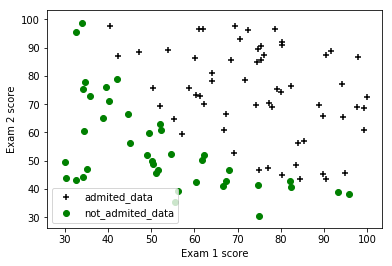

In [80]:
#Mostrar valores x e y
admited_data = data.loc[data['Admitido'] == 1]
not_admited_data = data.loc[data['Admitido'] == 0]

mp.figure()
mp.xlabel("Exam 1 score")
mp.ylabel("Exam 2 score")
mp.scatter(admited_data['Examen 1'],admited_data['Examen 2'],marker='+',c='k',label="admited_data")
mp.scatter(not_admited_data['Examen 1'],not_admited_data['Examen 2'],marker='o',c='g',label="not_admited_data")
mp.legend()

In [81]:
#Preparacion de datos para logistic regression
m = data.shape[0]
x = np.matrix(data.loc[:,['Examen 1','Examen 2']])
x = np.insert(x,0,1,axis=1)
x_T = x.T
y = np.matrix(data.loc[:,'Admitido'])
y_T = y.T
theta = np.zeros(x.shape[1])

In [82]:
#Sigmoid function

sigmoid_function = lambda a : 1 / (1 + np.vectorize(np.exp)(-a))

#Gradient function
def gradient(theta,x_T,y_T,m):
    gradient = 1/m * x_T * (sigmoid_function(theta * x_T).T - y_T)
    return (np.asarray(gradient).ravel())

#Cost function
def cost_function(theta,x_T,y_T,m):
    cost = -1/m * ((np.log(sigmoid_function(theta * x_T)) * y_T) + (np.log(1 - sigmoid_function(theta * x_T)) * (1 - y_T)))
    return (np.asarray(cost).ravel()[0])

In [83]:
#Calculo del valor optimo de los parametros
result = opt.fmin_tnc(func=cost_function,x0=theta,fprime=gradient,args=(x_T,y_T,m))
theta_opt = result[0]
print (theta_opt)
print(cost_function(result[0],x_T,y_T,m))



[-25.16131855   0.20623159   0.20147149]
0.20349770158947486


In [86]:
def draw_decision_boundary(X, Y, theta,admited_data,not_admited_data):
    
    #Configure the figure and the sigmoid function
    mp.figure()
    x1_min, x1_max = x[:, 1].min(), x[:, 1].max()
    x2_min, x2_max = x[:, 2].min(), x[:, 2].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),np.linspace(x2_min, x2_max))
    xtest = np.c_[np.ones((xx1.ravel().shape[0], 1)),xx1.ravel(),xx2.ravel()].T
    h = sigmoid_function(theta.dot(xtest))
    h = h.reshape(xx1.shape)
    
    #Draw data
    mp.xlabel("Exam 1 score")
    mp.ylabel("Exam 2 score")
    mp.scatter(admited_data['Examen 1'],admited_data['Examen 2'],marker='+',c='k',label="admited_data")
    mp.scatter(not_admited_data['Examen 1'],not_admited_data['Examen 2'],marker='o',c='g',label="not_admited_data")
    mp.legend()
    
    #Draw decision boundary
    mp.contour(xx1,xx2,h,[0.5])

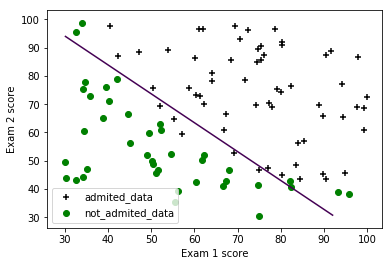

In [87]:
draw_decision_boundary(x_T,y_T,theta_opt,admited_data,not_admited_data)

In [ ]:
#Accuracy

